# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Georama Jonathan Yustindra
- **Email:** georama.jonathan.yustindra@mail.ugm.ac.id
- **ID Dicoding:** georama_jonathan_yustindra_MamF

## Dataset Information

*   dteday : date
*   season : season (1:winter, 2:spring, 3:summer, 4:fall)
*   yr : year (0: 2011, 1:2012)
*   mnth : month ( 1 to 12)
*   hr : hour (0 to 23)
*   holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
*   weekday : day of the week
*   weathersit :
    1. 1 = Clear, Few clouds, Partly cloudy, Partly cloudy
    2. 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
*   temp : Normalized temperature in Celsius. The values are divided to 41 (max)
*   atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
*   hum: Normalized humidity. The values are divided to 100 (max)
*   windspeed: Normalized wind speed in miles per hour. The values are divided to 67 (max)
*   casual: count of casual user rides
*   registered: count of registered user rides
*   cnt: count of total rental bike rides including both casual and registered

## Menentukan Pertanyaan Bisnis

1.   Bagaimana rata-rata peminjaman sepeda pada akhir pekan selama musim panas dan musim dingin?**
2.   Bagaimana pengaruh cuaca terhadap rata-rata peminjaman sepeda selama tahun 2011?




## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Wrangling

---





### 1.1 Gathering Data

In [2]:
df_hour = pd.read_csv("https://raw.githubusercontent.com/georamajo/Dicoding-Submission-Bike-Hiring/main/data/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df_day = pd.read_csv("https://raw.githubusercontent.com/georamajo/Dicoding-Submission-Bike-Hiring/main/data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 1.2 Assessing Data


**Melakukan pemerikasaan tipe data dari setiap kolom**

In [4]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


✅ semua tipe data sudah sesuai

**Melakukan pemerikasaan jika ada nilai yang hilang**

In [6]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

✅ *hasil diatas menunjukan data tidak ada yang hilang*

**Melakukan pemerikasaan jika ada data yang terduplikasi**

In [8]:
print("Duplikasi data: ", df_hour.duplicated().sum())

Duplikasi data:  0


In [9]:
print("Duplikasi data: ", df_day.duplicated().sum())

Duplikasi data:  0


✅ *hasil diatas menunjukan tidak ada data yang terduplikasi*

### 1.3 Cleaning Data

✅ Tidak terdapat data yang bermasalah dan siap untuk dilakukan EDA ⏭

## 2. Exploratory Data Analysis (EDA)

**Menggabungkan hour_df dan day_df berdasarkan kolom dteday**

In [10]:
df_bike = df_hour.merge(df_day, on='dteday', how='inner', suffixes=('_hour', '_day'))
df_bike.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [11]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

**Mengubah keterangan pada kolom weathershit agar mudah dibaca**


In [12]:
weather_mapping = {
    1: 'cerah',
    2: 'kabut',
    3: 'hujan ringan',
    4: 'hujan lebat'
}

df_bike['weathersit_hour'] = df_bike['weathersit_hour'].map(weather_mapping)
df_bike['weathersit_day'] = df_bike['weathersit_day'].map(weather_mapping)

**Mengubah keterangan pada kolom season agar mudah dibaca**

In [13]:
season_mapping = {
    1: 'musim dingin',
    2: 'musim semi',
    3: 'musim panas',
    4: 'musim gugur'
}

df_bike['season_hour'] = df_bike['season_hour'].map(season_mapping)
df_bike['season_day'] = df_bike['season_day'].map(season_mapping)

In [14]:
df_bike.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,musim dingin,0,1,0,0,6,0,cerah,...,6,0,kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,musim dingin,0,1,1,0,6,0,cerah,...,6,0,kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,musim dingin,0,1,2,0,6,0,cerah,...,6,0,kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,musim dingin,0,1,3,0,6,0,cerah,...,6,0,kabut,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,musim dingin,0,1,4,0,6,0,cerah,...,6,0,kabut,0.344167,0.363625,0.805833,0.160446,331,654,985


## 3. Visualization & Explanatory Analysis

1.   Bagaimana rata-rata peminjaman sepeda pada akhir pekan selama musim panas dan musim dingin?**
2.   Bagaimana pengaruh cuaca terhadap rata-rata peminjaman sepeda per hari selama satu tahun?




### Pertanyaan 1:

Berapa rata-rata jumlah peminjaman sepeda per jam pada akhir pekan selama musim panas dan musim dingin?

In [15]:
df_bike['dteday'] = pd.to_datetime(df_bike['dteday'])

In [16]:
df_weekend = df_bike[df_bike['weekday_hour'].isin([6, 0])]

In [17]:
df_summer = df_weekend[df_weekend['season_hour'] == 'musim panas']
df_winter = df_weekend[df_weekend['season_hour'] == 'musim dingin']

In [18]:
summer_avg = df_summer.groupby('hr')['cnt_hour'].mean().reset_index()
winter_avg = df_winter.groupby('hr')['cnt_hour'].mean().reset_index()

In [19]:
summer_avg

,hr,cnt_hour
0,0,131.788462
1,1,95.384615
2,2,77.615385
3,3,38.365385
4,4,11.057692
5,5,12.673077
6,6,24.576923
7,7,51.660377
8,8,129.245283
9,9,226.867925


In [20]:
winter_avg

,hr,cnt_hour
0,0,45.907407
1,1,39.000000
2,2,30.076923
3,3,15.018519
4,4,4.692308
5,5,4.042553
6,6,5.641509
7,7,16.388889
8,8,46.833333
9,9,76.462963


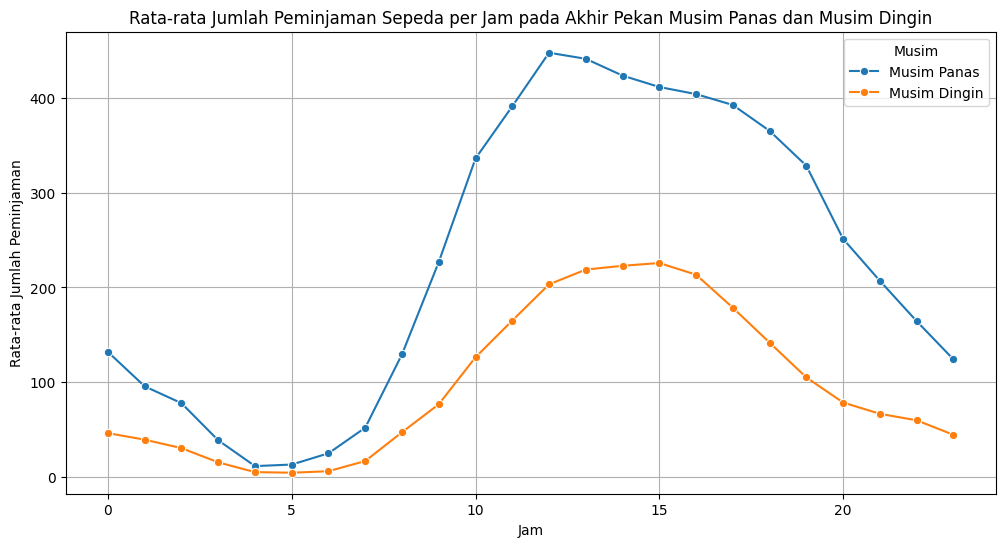

In [21]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='hr', y='cnt_hour', data=summer_avg, marker='o', label='Musim Panas')
sns.lineplot(x='hr', y='cnt_hour', data=winter_avg, marker='o', label='Musim Dingin')

plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam pada Akhir Pekan Musim Panas dan Musim Dingin')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.legend(title='Musim')
plt.grid(True)
plt.show()

### Pertanyaan 2:

Bagaimana pengaruh cuaca terhadap rata-rata peminjaman sepeda selama tahun 2011?

In [22]:
df_bike_2011 = df_bike[df_bike['dteday'].dt.year == 2011]

In [23]:
df_bike_2011.loc[:, 'month'] = df_bike_2011['dteday'].dt.month

<ipython-input-23-2abb53c14556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_2011.loc[:, 'month'] = df_bike_2011['dteday'].dt.month


In [24]:
avg_bike_rentals_monthly = df_bike_2011.groupby(['mnth_day', 'weathersit_day'])['cnt_day'].mean().reset_index()

In [25]:
avg_bike_rentals_monthly['weathersit_day'] = pd.Categorical(avg_bike_rentals_monthly['weathersit_day'], categories=['cerah', 'kabut', 'hujan ringan', 'hujan lebat'], ordered=True)
avg_bike_rentals_monthly = avg_bike_rentals_monthly.sort_values(by=['mnth_day', 'weathersit_day'])

In [26]:
avg_bike_rentals_monthly

,mnth_day,weathersit_day,cnt_day
0,1,cerah,1267.577836
2,1,kabut,1305.327645
1,1,hujan ringan,506.000000
3,2,cerah,1858.250000
4,2,kabut,1443.861244
5,3,cerah,2335.657568
7,3,kabut,1836.637011
6,3,hujan ringan,1177.086957
8,4,cerah,3742.285714
10,4,kabut,2777.281337


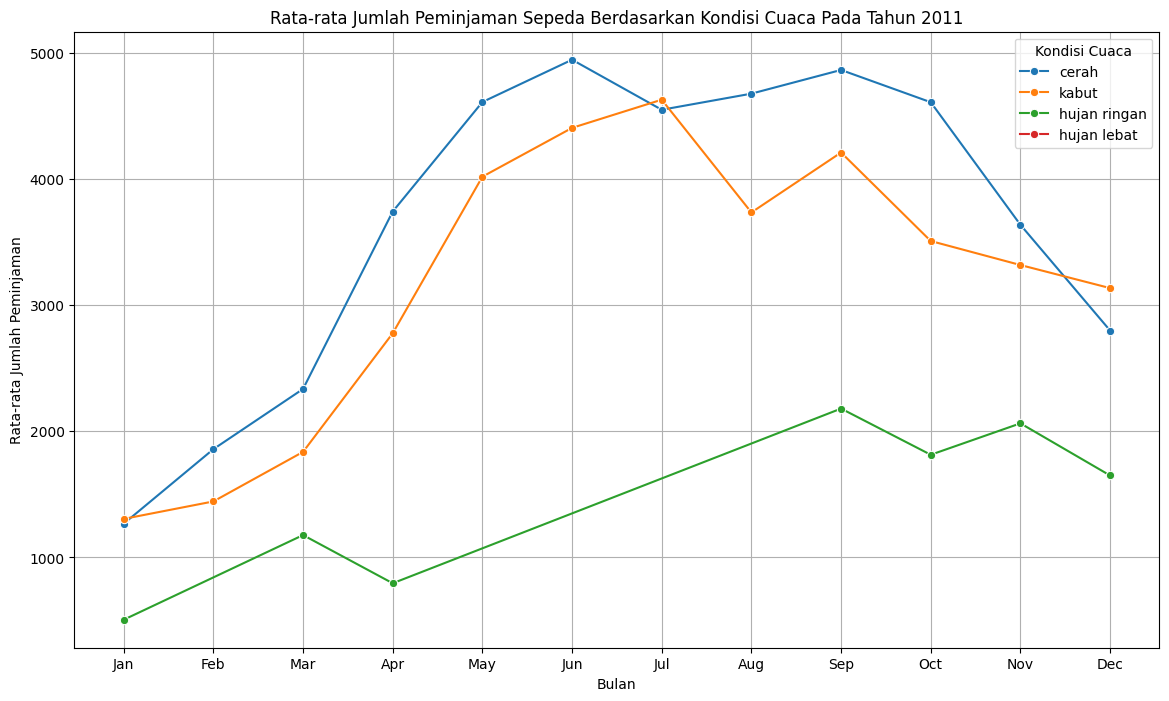

In [27]:
plt.figure(figsize=(14, 8))

sns.lineplot(x='mnth_day', y='cnt_day', hue='weathersit_day', data=avg_bike_rentals_monthly, marker='o')

plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca Pada Tahun 2011')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Kondisi Cuaca')
plt.grid(True)
plt.show()

## Conclusion

1. **Bagaimana rata-rata peminjaman sepeda pada akhir pekan selama musim panas dan musim dingin?**

  *   Rata-rata peminjam sepeda pada  di akhir pekan selama musim panas paling tinggi pada pukul 12 siang dan terendah pada pukul 4 pagi
  *   Rata-rata peminjam sepeda pada  di akhir pekan selama musim dingin paling tinggi pada pukul 3 sore dan terendah pada pukul 4 pagi
  *   Perbandingan grafik tersebut pada musim dingin peminjaman sepeda lebih sedikit daripada saat musim panas diakhir pekan. Hal tersebut menunjukan bahwa kedaan musim berpengaruh terhadap jumlah peminjaman sepeda sekalipun pada akhir pekan.

2.   **Bagaimana pengaruh cuaca terhadap rata-rata peminjaman sepeda selama tahun 2011?**
  *   Rata-rata peminjaman sepeda pada tiap bulannya paling banyak terdapat pada saat cuaca cerah> Pada urutan kedua pada saat cuaca kabut, dan yang terakhir pada cuaca hujan ringan.
  *  Tidak ada peminjaman pada saat cuaca hujan lebat
  *  Peminjaman rata-rata tertinggi pada saat cuaca cerah yaitu pada bulan juni, kemudian cuaca kabut pada bulan juli, dan dengan cuaca hujan ringan pada bulan september.


In [ ]:
from google.colab import files

# Misalkan data Anda disimpan dalam DataFrame `df`
df_bike.to_csv('cleanned_bike.csv', index=False)

# Mengunduh file
files.download('cleanned_bike.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>